# Project Title: IPL Score Prediction
## 1. Project Initialization

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 2. Data Understanding
## 2.1 Data Collection

In [138]:
df=pd.read_csv("C:\\Users\\Admin\\Desktop\\python cuvette assignments\\Final\\ipl.csv")

## 2.2 Data Exploration

In [140]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [142]:
df.shape

(76014, 15)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [146]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [148]:
# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [152]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


# 3. Data Preprocessing

## 3.1 Data Cleaning

In [154]:
# Drop irrelevant columns
columns_to_drop = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(columns_to_drop, axis=1, inplace=True)

print("Columns after removal:", df.columns)
df.head()

Columns after removal: Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')


,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [156]:
# List of consistent teams (customize based on your dataset)
consistent_teams = [
    'Chennai Super Kings', 'Mumbai Indians', 'Kolkata Knight Riders',
    'Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils',
    'Rajasthan Royals', 'Deccan Chargers'
]

# Filter rows where both batting and bowling teams are in consistent_teams
df = df[df['bat_team'].isin(consistent_teams) & df['bowl_team'].isin(consistent_teams)]

print("Teams after filtering:", df['bat_team'].unique())

Teams after filtering: ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils']


In [158]:
# Remove rows where overs < 5.0
df = df[df['overs'] >= 5.0]

print("Data after removing first 5 overs:", df.shape)

Data after removing first 5 overs: (40895, 9)


In [160]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

print("Date column after conversion:", df['date'].dtype)

Date column after conversion: datetime64[ns]


## 3.2 Feature Selection

In [163]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [165]:
correlation_matrix = numerical_df.corr()

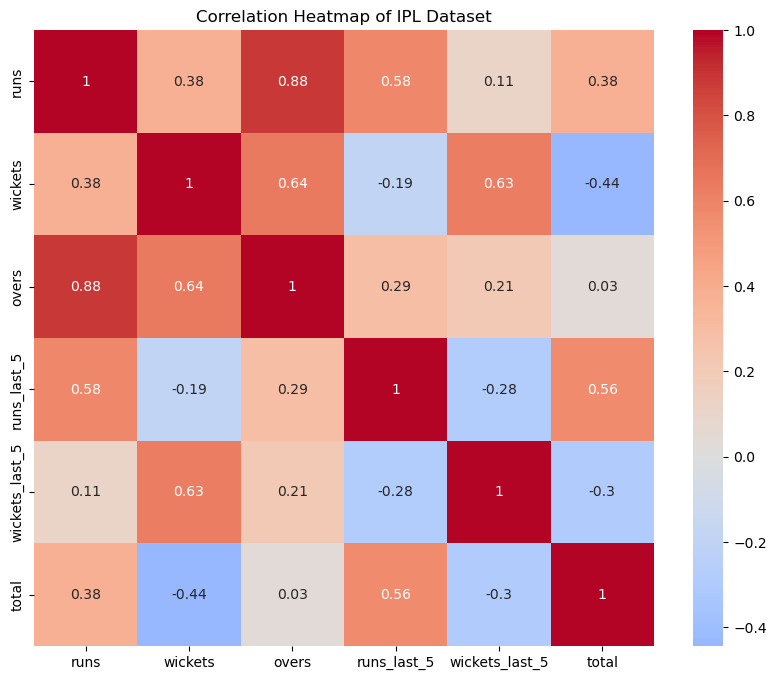

In [167]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme
    center=0,  # Center at 0 (no correlation)
)
plt.title("Correlation Heatmap of IPL Dataset")
plt.show()

## 3.3 Encoding Categorical Features

In [170]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

categorical_cols = ['bat_team', 'bowl_team']
print(df[['bat_team', 'bowl_team']].isnull().sum())

bat_team     0
bowl_team    0
dtype: int64


In [174]:
# Create the transformer
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),
    remainder='passthrough'  # Keeps all other columns unchanged
)

# Fit and transform the data
transformed_data = transformer.fit_transform(df)

# --- Get feature names for the transformed data ---
# 1. Get OneHot encoded feature names
encoder = transformer.named_transformers_['onehotencoder']
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# 2. Get passthrough (non-encoded) column names
passthrough_columns = [col for col in df.columns if col not in categorical_cols]

# 3. Combine all feature names
all_feature_names = list(encoded_feature_names) + passthrough_columns

# Create final DataFrame
df_final = pd.DataFrame(transformed_data, columns=all_feature_names)

# Verify no NaN values
print("\nNaN values after encoding:", df_final.isnull().sum().sum())
print("\nFirst 5 rows of transformed data:")
df_final.head()


NaN values after encoding: 0

First 5 rows of transformed data:


,bat_team_Chennai Super Kings,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Deccan Chargers,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,date,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2008-04-18,61,0,5.1,59,0,222
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2008-04-18,61,1,5.2,59,1,222
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2008-04-18,61,1,5.3,59,1,222
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2008-04-18,61,1,5.4,59,1,222
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2008-04-18,61,1,5.5,58,1,222


## 3.4 Splitting Data into Training and Testing Sets

In [176]:
# Training data: All matches before 2017
train_data = df_final[df_final['date'].dt.year < 2017]

# Test data: All matches in 2017
test_data = df_final[df_final['date'].dt.year == 2017]

In [178]:
train_data = train_data.drop('date', axis=1)
test_data = test_data.drop('date', axis=1)

In [180]:
# Features (X) - All columns except 'total'
X_train = train_data.drop('total', axis=1)
X_test = test_data.drop('total', axis=1)

# Target (y) - 'total' runs
y_train = train_data['total']
y_test = test_data['total']

In [182]:
print(f"Training set size: {X_train.shape[0]} matches (2008-2016)")
print(f"Test set size: {X_test.shape[0]} matches (2017)")

Training set size: 38958 matches (2008-2016)
Test set size: 1937 matches (2017)


# 4. Model Building

## 4.1 Models Used

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

## 4.2 Model Training and Evaluation

In [188]:
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Decision Tree": (
        DecisionTreeRegressor(),
        {"max_depth": [5, 10, 15, None], "min_samples_split": [2, 5, 10]}
    ),
    "Random Forest": (
        RandomForestRegressor(),
        {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}
    ),
    "AdaBoost (Linear)": (
        AdaBoostRegressor(estimator=LinearRegression()),
        {"n_estimators": [50, 100], "learning_rate": [0.5, 1.0]}
    )
}

## 4.3 Model Comparison

In [191]:
print(X_train.dtypes)
print("______________________________________________________________________")
print(X_train.isna().sum())  # Check which columns have NaN values
print("______________________________________________________________________")
print(X_train.info())       # Check data types and missing values

bat_team_Chennai Super Kings             object
bat_team_Deccan Chargers                 object
bat_team_Delhi Daredevils                object
bat_team_Kings XI Punjab                 object
bat_team_Kolkata Knight Riders           object
bat_team_Mumbai Indians                  object
bat_team_Rajasthan Royals                object
bat_team_Royal Challengers Bangalore     object
bowl_team_Chennai Super Kings            object
bowl_team_Deccan Chargers                object
bowl_team_Delhi Daredevils               object
bowl_team_Kings XI Punjab                object
bowl_team_Kolkata Knight Riders          object
bowl_team_Mumbai Indians                 object
bowl_team_Rajasthan Royals               object
bowl_team_Royal Challengers Bangalore    object
runs                                     object
wickets                                  object
overs                                    object
runs_last_5                              object
wickets_last_5                          

In [193]:
results = {}

for name, (model, params) in models.items():
    print(f"Training {name}...")
    
    # GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    
    # Best model
    best_model = grid.best_estimator_
    
    # Predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Store results
    results[name] = {
    "Best Params": grid.best_params_,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "trained_model": best_model  # Add this line to store the trained model
}

Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training AdaBoost (Linear)...


In [195]:
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Best Params: {metrics['Best Params']}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")


Linear Regression:
Best Params: {}
MAE: 13.11
MSE: 297.48
RMSE: 17.25

Decision Tree:
Best Params: {'max_depth': 10, 'min_samples_split': 5}
MAE: 16.21
MSE: 471.57
RMSE: 21.72

Random Forest:
Best Params: {'max_depth': 10, 'n_estimators': 200}
MAE: 14.53
MSE: 352.43
RMSE: 18.77

AdaBoost (Linear):
Best Params: {'learning_rate': 0.5, 'n_estimators': 50}
MAE: 12.76
MSE: 280.78
RMSE: 16.76


# 5. Model Optimization with AdaBoost
## 5.1 AdaBoost with Linear Regression


In [197]:
# Initialize AdaBoost with Linear Regression as base
adaboost_lr = AdaBoostRegressor(
    estimator=LinearRegression(),  # Base learner
    n_estimators=50,              # Number of boosting iterations
    random_state=42
)

# Train and evaluate
adaboost_lr.fit(X_train, y_train)
y_pred_ada = adaboost_lr.predict(X_test)

# Compare with base Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Calculate RMSE
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"AdaBoost (Linear) RMSE: {rmse_ada:.2f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")

AdaBoost (Linear) RMSE: 16.74
Linear Regression RMSE: 17.25


## 5.2 Final Model Selection

In [199]:
import joblib

# Save the best model and transformer
joblib.dump(lr, 'final_model.pkl')
joblib.dump(transformer, 'feature_transformer.pkl')



['feature_transformer.pkl']

# 6. Predictions
## 6.1 Predicting IPL Scores

In [202]:
# Load saved model and transformer
model = joblib.load('final_model.pkl')
transformer = joblib.load('feature_transformer.pkl')

In [204]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import joblib

def predict_score(batting_team, bowling_team, overs, runs, wickets, runs_last_5, wickets_last_5):
    """
    Predicts the final score of an innings.
    
    Args:
        batting_team (str): Name of batting team
        bowling_team (str): Name of bowling team
        overs (float): Current over (e.g., 10.2 for 10.2 overs)
        runs (int): Runs scored so far
        wickets (int): Wickets fallen so far
        runs_last_5 (int): Runs in last 5 overs
        wickets_last_5 (int): Wickets in last 5 overs
        
    Returns:
        dict: Predicted score and wickets
    """
    # Create input DataFrame
    input_data = pd.DataFrame({
        'bat_team': [batting_team],
        'bowl_team': [bowling_team],
        'runs': [runs],
        'wickets': [wickets],
        'overs': [overs],
        'runs_last_5': [runs_last_5],
        'wickets_last_5': [wickets_last_5]
    })
    
    # Create a new transformer for prediction
    categorical_cols = ['bat_team', 'bowl_team']
    numerical_cols = ['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']
    
    # Initialize OneHotEncoder with categories from training
    consistent_teams = [
        'Chennai Super Kings', 'Mumbai Indians', 'Kolkata Knight Riders',
        'Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils',
        'Rajasthan Royals', 'Deccan Chargers'
    ]
    
    ohe = OneHotEncoder(
        categories=[consistent_teams, consistent_teams],
        handle_unknown='ignore'
    )
    
    # Create column transformer
    transformer = make_column_transformer(
        (ohe, categorical_cols),
        remainder='passthrough'
    )
    
    # Transform the input data
    input_transformed = transformer.fit_transform(input_data)
    
    # Load the trained model
    model = joblib.load('final_model.pkl')
    
    # Predict
    predicted_total = model.predict(input_transformed)[0]
    
    # Round to nearest integer
    predicted_total = int(round(predicted_total))
    
    # Predict wickets
    predicted_wickets = min(10, int(round(wickets * (predicted_total / runs))) if runs > 0 else wickets)
    
    return {
        'predicted_score': f"{predicted_total}/{predicted_wickets}",
        'batting_team': batting_team,
        'bowling_team': bowling_team
    }

## 6.2 Example Predictions

In [206]:
print(predict_score(
    batting_team='Kolkata Knight Riders',
    bowling_team='Delhi Daredevils',
    overs=15.0,
    runs=120,
    wickets=3,
    runs_last_5=45,
    wickets_last_5=1
))

{'predicted_score': '168/4', 'batting_team': 'Kolkata Knight Riders', 'bowling_team': 'Delhi Daredevils'}


In [208]:
print(predict_score(
    batting_team='Sunrisers Hyderabad',
    bowling_team='Royal Challengers Bangalore',
    overs=12.0,
    runs=80,
    wickets=6,
    runs_last_5=30,
    wickets_last_5=3
))

{'predicted_score': '135/10', 'batting_team': 'Sunrisers Hyderabad', 'bowling_team': 'Royal Challengers Bangalore'}
